In [29]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
df=pd.read_csv('cproducts.csv')
df.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_20482,20-10-1975,male,MADHYA PRADESH,453441.0,01-05-2016,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1.000446e+09,PATANJALI CHOCOS 125g,55.00,Payback
1,BBID_20485,21-07-1955,female,NaN,999999.0,09-03-2017,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,NaN,1.000010e+09,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback
2,BBID_20498,19-03-1981,female,MAHARASHTRA,400064.0,12-08-2015,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,971754,AD 399 FLAT LADIES JEANS FASHION EXC,1.000080e+12,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback
3,BBID_20499,10-05-1986,male,MAHARASHTRA,400099.0,18-12-2016,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,NaN,1.000443e+09,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback
4,BBID_204110,29-02-1988,male,MADHYA PRADESH,474001.0,31-12-2015,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,974126,NMP 5% OFF CONCEPT DISCOUNT 2655,3.004817e+08,MAGGI NDL MERI MASALA PP 70g,34.20,Payback


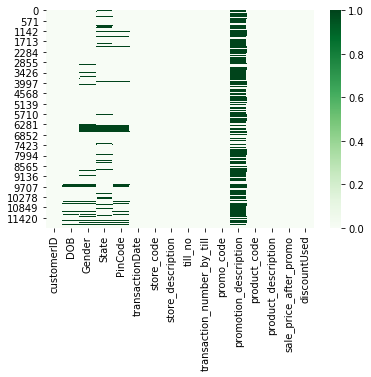

In [4]:
sns.heatmap(df.isnull(),cmap="Greens");

In [5]:
print("Shape of the data",df.shape)
print(df.isnull().sum())

Shape of the data (11972, 16)
customerID                       0
DOB                            319
Gender                        1028
State                         1583
PinCode                        817
transactionDate                  0
store_code                       0
store_description                0
till_no                          0
transaction_number_by_till       0
promo_code                       0
promotion_description         8510
product_code                     0
product_description              0
sale_price_after_promo           0
discountUsed                     0
dtype: int64


In [6]:
df.drop(['promotion_description'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

customerID                       0
DOB                            319
Gender                        1028
State                         1583
PinCode                        817
transactionDate                  0
store_code                       0
store_description                0
till_no                          0
transaction_number_by_till       0
promo_code                       0
product_code                     0
product_description              0
sale_price_after_promo           0
discountUsed                     0
dtype: int64

In [8]:
sex=pd.get_dummies(df['Gender'],drop_first=True)
sex.tail()

,male
11967,1
11968,0
11969,0
11970,0
11971,1


In [9]:
df1=pd.concat([df,sex],axis=1)
df1.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,product_code,product_description,sale_price_after_promo,discountUsed,male
0,BBID_20482,20-10-1975,male,MADHYA PRADESH,453441.0,01-05-2016,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,1.000446e+09,PATANJALI CHOCOS 125g,55.00,Payback,1
1,BBID_20485,21-07-1955,female,NaN,999999.0,09-03-2017,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,1.000010e+09,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback,0
2,BBID_20498,19-03-1981,female,MAHARASHTRA,400064.0,12-08-2015,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,971754,1.000080e+12,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback,0
3,BBID_20499,10-05-1986,male,MAHARASHTRA,400099.0,18-12-2016,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,1.000443e+09,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback,1
4,BBID_204110,29-02-1988,male,MADHYA PRADESH,474001.0,31-12-2015,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,974126,3.004817e+08,MAGGI NDL MERI MASALA PP 70g,34.20,Payback,1


In [10]:
df1['male'].value_counts().argmax()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


1

In [11]:
df1.male.fillna(1,inplace=True)
df1.isnull().sum()

customerID                       0
DOB                            319
Gender                        1028
State                         1583
PinCode                        817
transactionDate                  0
store_code                       0
store_description                0
till_no                          0
transaction_number_by_till       0
promo_code                       0
product_code                     0
product_description              0
sale_price_after_promo           0
discountUsed                     0
male                             0
dtype: int64

In [12]:
df1['PinCode'].value_counts().argmax()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


452001.0

In [13]:
df1.PinCode.fillna(452001,inplace=True)

In [14]:
df1['State'].value_counts().argmax()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


'MADHYA PRADESH'

In [15]:
df1.State.fillna('MADHYA PRADESH',inplace=True)
df1.drop(['Gender','DOB'],axis=1,inplace=True)

In [16]:
df1.isnull().sum()

customerID                    0
State                         0
PinCode                       0
transactionDate               0
store_code                    0
store_description             0
till_no                       0
transaction_number_by_till    0
promo_code                    0
product_code                  0
product_description           0
sale_price_after_promo        0
discountUsed                  0
male                          0
dtype: int64

In [17]:
df1.head()

,customerID,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,product_code,product_description,sale_price_after_promo,discountUsed,male
0,BBID_20482,MADHYA PRADESH,453441.0,01-05-2016,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,1.000446e+09,PATANJALI CHOCOS 125g,55.00,Payback,1
1,BBID_20485,MADHYA PRADESH,999999.0,09-03-2017,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,1.000010e+09,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback,0
2,BBID_20498,MAHARASHTRA,400064.0,12-08-2015,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,971754,1.000080e+12,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback,0
3,BBID_20499,MAHARASHTRA,400099.0,18-12-2016,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,1.000443e+09,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback,1
4,BBID_204110,MADHYA PRADESH,474001.0,31-12-2015,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,974126,3.004817e+08,MAGGI NDL MERI MASALA PP 70g,34.20,Payback,1


In [18]:
d={'PinCode':int}
df1=df1.astype(d)

In [19]:
df1.head()

,customerID,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,product_code,product_description,sale_price_after_promo,discountUsed,male
0,BBID_20482,MADHYA PRADESH,453441,01-05-2016,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,1.000446e+09,PATANJALI CHOCOS 125g,55.00,Payback,1
1,BBID_20485,MADHYA PRADESH,999999,09-03-2017,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,1.000010e+09,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback,0
2,BBID_20498,MAHARASHTRA,400064,12-08-2015,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,971754,1.000080e+12,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback,0
3,BBID_20499,MAHARASHTRA,400099,18-12-2016,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,1.000443e+09,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback,1
4,BBID_204110,MADHYA PRADESH,474001,31-12-2015,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,974126,3.004817e+08,MAGGI NDL MERI MASALA PP 70g,34.20,Payback,1


In [20]:
df1.dtypes

customerID                     object
State                          object
PinCode                         int64
transactionDate                object
store_code                      int64
store_description              object
till_no                         int64
transaction_number_by_till      int64
promo_code                     object
product_code                  float64
product_description            object
sale_price_after_promo        float64
discountUsed                   object
male                            uint8
dtype: object

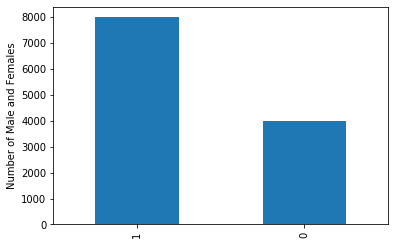

In [21]:
plt.ylabel('Number of Male and Females')
df1['male'].value_counts().plot.bar()

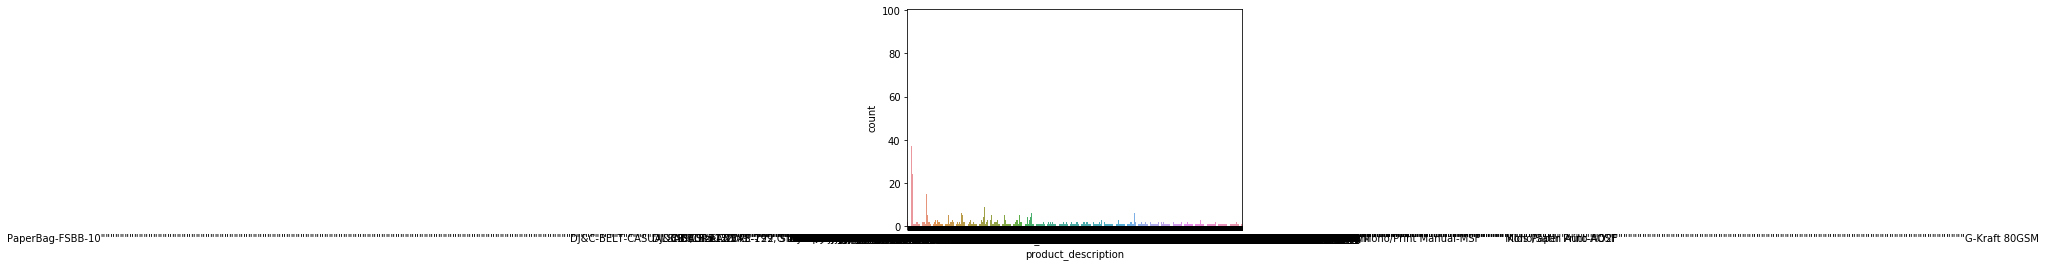

In [22]:
sns.countplot(x='product_description',data=df);

In [24]:
for i in range(len(df)):
    df1.loc[i,'Day']=int(df1.loc[i,'transactionDate'].split('-')[0])

In [25]:
df.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,product_code,product_description,sale_price_after_promo,discountUsed,Day
0,BBID_20482,20-10-1975,male,MADHYA PRADESH,453441.0,01-05-2016,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,1.000446e+09,PATANJALI CHOCOS 125g,55.00,Payback,1.0
1,BBID_20485,21-07-1955,female,NaN,999999.0,09-03-2017,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,1.000010e+09,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback,9.0
2,BBID_20498,19-03-1981,female,MAHARASHTRA,400064.0,12-08-2015,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,971754,1.000080e+12,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback,12.0
3,BBID_20499,10-05-1986,male,MAHARASHTRA,400099.0,18-12-2016,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,1.000443e+09,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback,18.0
4,BBID_204110,29-02-1988,male,MADHYA PRADESH,474001.0,31-12-2015,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,974126,3.004817e+08,MAGGI NDL MERI MASALA PP 70g,34.20,Payback,31.0


In [26]:
for i in range(len(df)):
    df1.loc[i,'Month']=int(df1.loc[i,'transactionDate'].split('-')[1])

In [27]:
df1.head()

,customerID,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,product_code,product_description,sale_price_after_promo,discountUsed,male,Day,Month
0,BBID_20482,MADHYA PRADESH,453441,01-05-2016,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,1.000446e+09,PATANJALI CHOCOS 125g,55.00,Payback,1,1.0,5.0
1,BBID_20485,MADHYA PRADESH,999999,09-03-2017,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,1.000010e+09,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback,0,9.0,3.0
2,BBID_20498,MAHARASHTRA,400064,12-08-2015,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,971754,1.000080e+12,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback,0,12.0,8.0
3,BBID_20499,MAHARASHTRA,400099,18-12-2016,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,1.000443e+09,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback,1,18.0,12.0
4,BBID_204110,MADHYA PRADESH,474001,31-12-2015,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,974126,3.004817e+08,MAGGI NDL MERI MASALA PP 70g,34.20,Payback,1,31.0,12.0


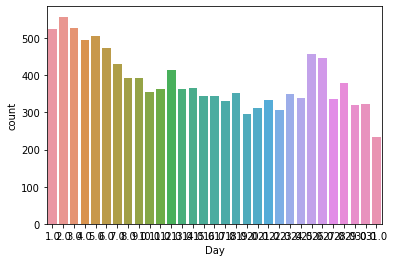

In [28]:
sns.countplot(x='Day',data=df);